# OT03の実験結果，およびシミュレーション結果の描画　（機械学会年次大会向け）

# import

In [27]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import gen_animation as gen
from cea_post import Read_datset as read_cea
from tqdm import tqdm
from datetime import datetime
from matplotlib.animation import ArtistAnimation

matplotlib.style.use("tj_origin.mplstyle")

# データ読み込み・インスタンス化

In [14]:
dic_result = {"ex": "2020_0806_190123_conf_OT03_ex",
              "sim": "2020_0806_185038_conf_OT03",
              "orich": "2020_0806_185313_conf_OT03_Orich",
              "frich": "2020_0806_185218_conf_OT03_Frich",
              "nonpc": "2020_0806_185703_conf_OT03_nonPc"
              }
print("reading \"ex\"\n")
inst_ex = gen.Main(dic_result["ex"])
print("reading \"sim\"\n")
inst_sim = gen.Main(dic_result["sim"])
print("reading \"orich\"\n")
inst_orich = gen.Main(dic_result["orich"])
print("reading \"frich\"\n")
inst_frich = gen.Main(dic_result["frich"])
print("reading \"nonpc\"\n")
inst_nonpc = gen.Main(dic_result["nonpc"])
print("Completed!")

reading "ex"

reading "sim"

reading "orich"

reading "frich"

reading "nonpc"

Completed!


# 圧力，および酸化剤流量履歴の表示(実験結果，圧力依存有りと無し)

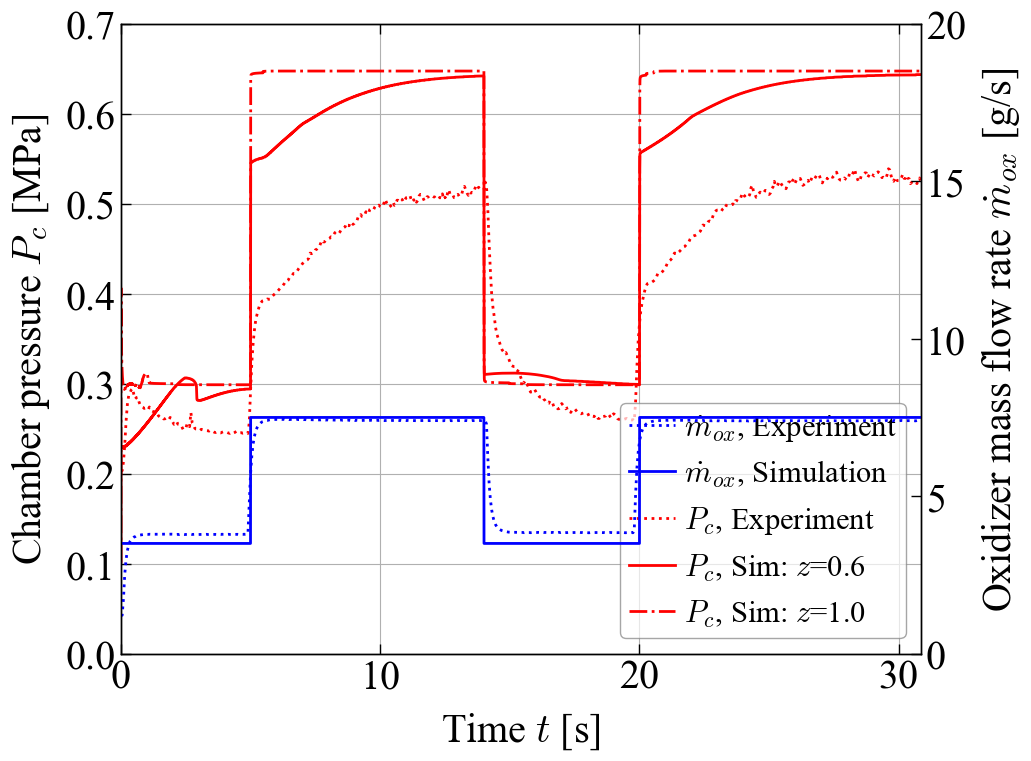

In [28]:
fig_hist = plt.figure(figsize=(10,9))
ax_hist = fig_hist.add_subplot(111)
ax2_hist = ax_hist.twinx()
ax_hist.plot(inst_ex.df["t"], inst_ex.df["Pc"]*1e-6, ls=":", c="r", label="$P_c$, Experiment")
ax_hist.plot(inst_sim.df["t"], inst_sim.df["Pc"]*1e-6, ls="-", c="r", label="$P_c$, Sim: $z$=0.6")
ax_hist.plot(inst_nonpc.df["t"], inst_nonpc.df["Pc"]*1e-6, ls="-.", c="r", label="$P_c$, Sim: $z$=1.0")
ax_hist.set_ylim(0.0, 0.7)
ax_hist.set_xlabel("Time $t$ [s]")
ax_hist.set_ylabel("Chamber pressure $P_c$ [MPa]")
ax2_hist.plot(inst_ex.df["t"], inst_ex.df["mox"]*1e+3, ls=":", c="b", label="$\dot m_{ox}$, Experiment")
ax2_hist.plot(inst_sim.df["t"], inst_sim.df["mox"]*1e+3, ls="-", c="b", label="$\dot m_{ox}$, Simulation")
ax2_hist.set_ylabel("Oxidizer mass flow rate $\dot m_{ox}$ [g/s]")
ax2_hist.set_ylim(0.0, 20.0)
hl1, lalbel1 = ax_hist.get_legend_handles_labels()
hl2, lalbel2 = ax2_hist.get_legend_handles_labels()
ax_hist.legend(hl2+hl1, lalbel2+lalbel1, loc="lower right", fontsize=22)
ax_hist.grid()
fig_hist.savefig("Pc_history.png", dpi=300)

# 後退形状履歴の表示

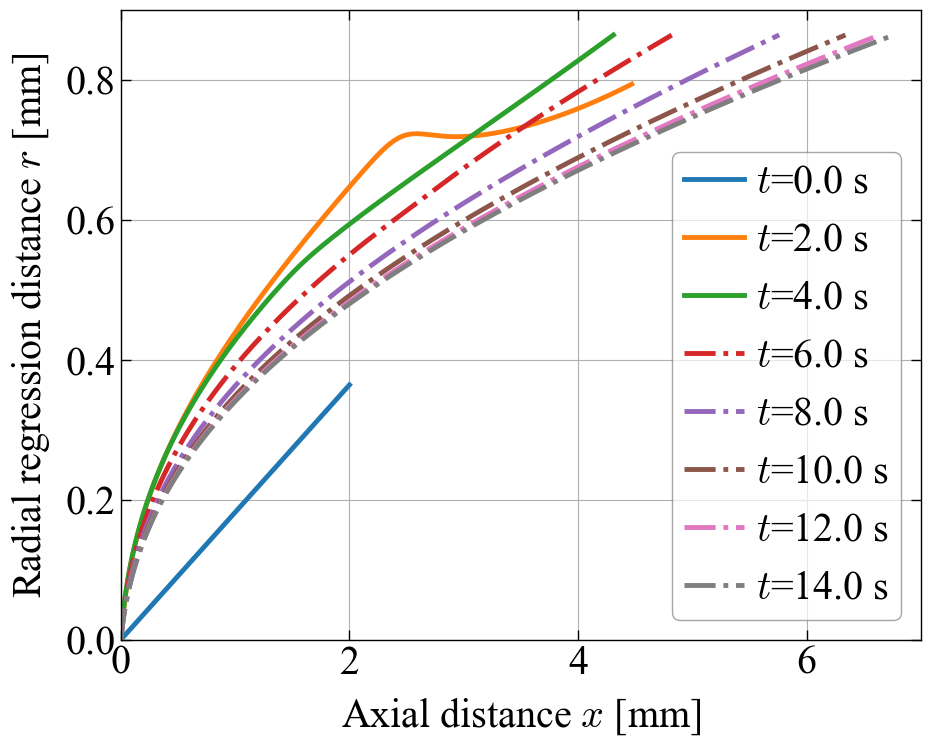

In [29]:
time_list = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0]
x_array = np.array([float(x) for x in inst_sim.df_r.columns])

fig_shape = plt.figure(figsize=(10,9))
ax_shape = fig_shape.add_subplot(111)
for t in time_list:
    if t<5.01:
        ax_shape.plot(x_array*1e+3, inst_sim.df_r.loc[t]*1e+3, ls="-", lw=3.5, label="$t$={} s".format(round(t, 2)))
    else:
        ax_shape.plot(x_array*1e+3, inst_sim.df_r.loc[t]*1e+3, ls="-.", lw=3.5, label="$t$={} s".format(round(t, 2)))
    # elif 5.01<=t and t<14.0:
    #     ax_shape.plot(x_array*1e+3, inst_sim.df_r.loc[t]*1e+3, ls="-.", lw=3.5, label="$t$={} s".format(round(t, 2)))
    # else:
    #     ax_shape.plot(x_array*1e+3, inst_sim.df_r.loc[t]*1e+3, ls=":", lw=3, label="$t$={} s".format(round(t, 2)))
ax_shape.set_ylim(0.0, 0.9)
ax_shape.set_xlim(0.0, 7.0)
ax_shape.set_xlabel("Axial distance $x$ [mm]")
ax_shape.set_ylabel("Radial regression distance $r$ [mm]")
ax_shape.legend(loc="lower right")
ax_shape.grid()
fig_shape.savefig("r_history.png", dpi=300)

# 特性排気速度，O/F，および燃料流量履歴の表示(最適O/F作動)

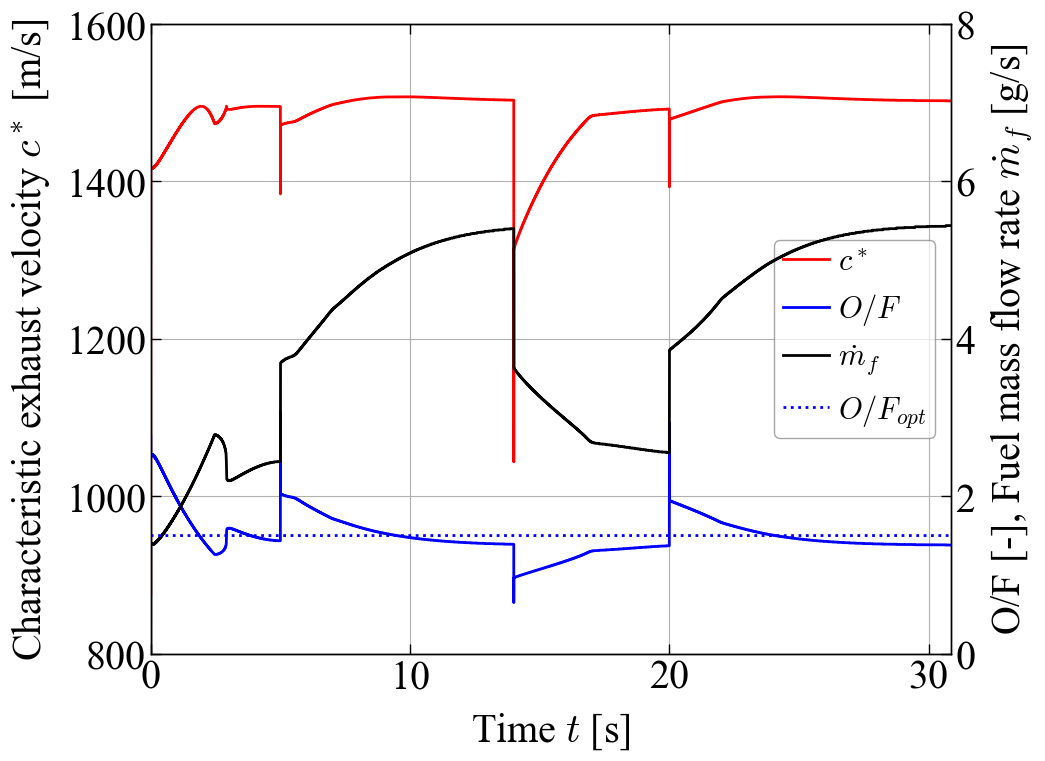

In [30]:
fig_cstr = plt.figure(figsize=(10,9))
ax_cstr = fig_cstr.add_subplot(111)
ax2_cstr = ax_cstr.twinx()
ax_cstr.plot(inst_sim.df["t"], inst_sim.df["cstr"], ls="-", c="r", label="$c^*$")
ax_cstr.set_ylim(800, 1600)
ax_cstr.set_xlabel("Time $t$ [s]")
ax_cstr.set_ylabel("Characteristic exhaust velocity $c^*$ [m/s]")
ax2_cstr.plot(inst_sim.df["t"], inst_sim.df["of"], ls="-", c="b", label="$O/F$")
ax2_cstr.plot(inst_sim.df["t"], inst_sim.df["mf"]*1e+3, ls="-", c="k", label="$\dot m_f$")
ax2_cstr.plot(inst_sim.df["t"], np.array([1.5 for i in inst_sim.df["t"]]), ls=":", c="b", label="$O/F_{opt}$")
ax2_cstr.set_ylabel("O/F [-], Fuel mass flow rate $\dot m_f$ [g/s]")
ax2_cstr.set_ylim(0.0, 8)
hl_cstr1, lalbel_cstr1 = ax_cstr.get_legend_handles_labels()
hl_cstr2, lalbel_cstr2 = ax2_cstr.get_legend_handles_labels()
ax_cstr.legend(hl_cstr1+hl_cstr2, lalbel_cstr1+lalbel_cstr2, loc="center right", fontsize=22)
ax_cstr.grid()
fig_cstr.savefig("cstr_history.png", dpi=300)

# cstr v.s. O/F のグラフ表示　（GOX v.s. Curable Resin）

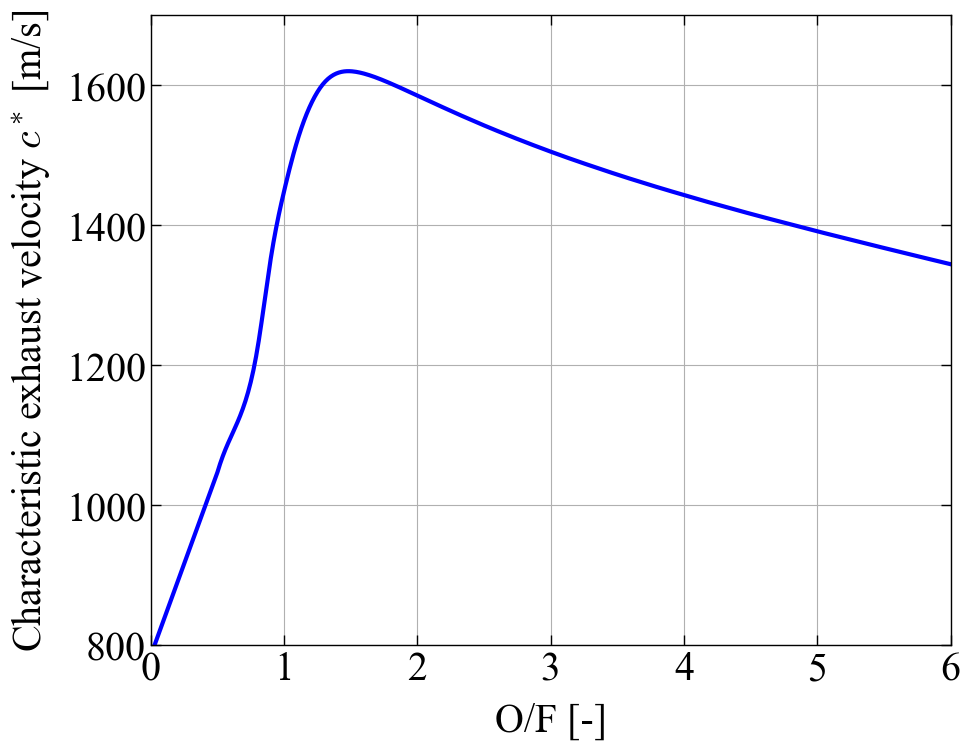

In [33]:
dbfld_path = os.path.join("cea_db", "GOX_CurableResin", "csv_database")
inst_cea = read_cea(dbfld_path)
func_cstr = inst_cea.gen_func("CSTAR", extraporate="linear")
of_range = np.arange(0.01, 6.0, 0.01)

fig_cea = plt.figure(figsize=(10, 9))
ax_cea = fig_cea.add_subplot(111)
ax_cea.plot(of_range, np.array([func_cstr(of, 0.4e+6) for of in of_range]), c="b", lw=3)
ax_cea.set_xlabel("O/F [-]")
ax_cea.set_ylabel("Characteristic exhaust velocity $c^*$ [m/s]")
ax_cea.set_xlim(0, 6.0)
ax_cea.set_ylim(800, 1700)
ax_cea.grid()
fig_cea.savefig("cstr_vs_of.png", dpi=300)

# O-rich 条件の燃圧および酸化剤流量履歴の表示

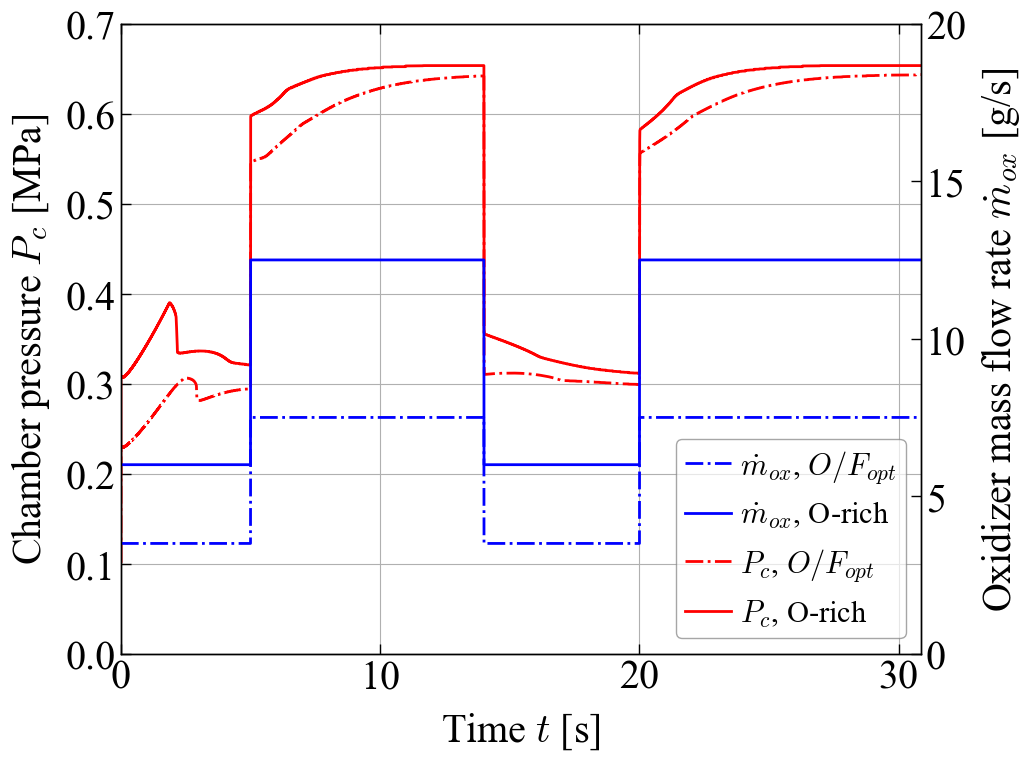

In [34]:
fig_hist_o = plt.figure(figsize=(10,9))
ax_hist_o = fig_hist_o.add_subplot(111)
ax2_hist_o = ax_hist_o.twinx()
ax_hist_o.plot(inst_sim.df["t"], inst_sim.df["Pc"]*1e-6, ls="-.", c="r", label="$P_c$, $O/F_{opt}$")
ax_hist_o.plot(inst_orich.df["t"], inst_orich.df["Pc"]*1e-6, ls="-", c="r", label="$P_c$, O-rich")
# ax_hist_o.plot(inst_nonpc.df["t"], inst_nonpc.df["Pc"]*1e-6, ls="-.", c="r", label="$P_c$, Sim: $z$=1.0")
ax_hist_o.set_ylim(0.0, 0.7)
ax_hist_o.set_xlabel("Time $t$ [s]")
ax_hist_o.set_ylabel("Chamber pressure $P_c$ [MPa]")
ax2_hist_o.plot(inst_sim.df["t"], inst_sim.df["mox"]*1e+3, ls="-.", c="b", label="$\dot m_{ox}$, $O/F_{opt}$")
ax2_hist_o.plot(inst_orich.df["t"], inst_orich.df["mox"]*1e+3, ls="-", c="b", label="$\dot m_{ox}$, O-rich")
ax2_hist_o.set_ylabel("Oxidizer mass flow rate $\dot m_{ox}$ [g/s]")
ax2_hist_o.set_ylim(0.0, 20.0)
hl1_o, lalbel1_o = ax_hist_o.get_legend_handles_labels()
hl2_o, lalbel2_o = ax2_hist_o.get_legend_handles_labels()
ax_hist_o.legend(hl2_o+hl1_o, lalbel2_o+lalbel1_o, loc="lower right", fontsize=22)
ax_hist_o.grid()
fig_hist_o.savefig("Pc_history_orich.png", dpi=300)

# F-rich 条件の燃圧および酸化剤流料理歴の表示

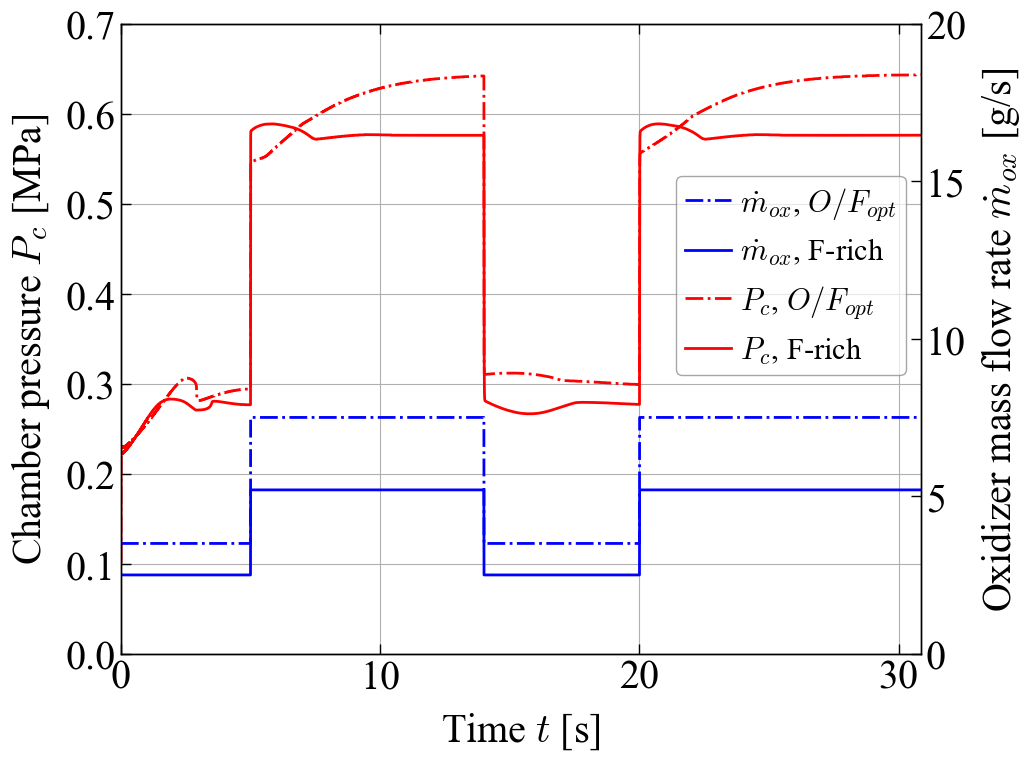

In [35]:
fig_hist_f = plt.figure(figsize=(10,9))
ax_hist_f = fig_hist_f.add_subplot(111)
ax2_hist_f = ax_hist_f.twinx()
ax_hist_f.plot(inst_sim.df["t"], inst_sim.df["Pc"]*1e-6, ls="-.", c="r", label="$P_c$, $O/F_{opt}$")
ax_hist_f.plot(inst_frich.df["t"], inst_frich.df["Pc"]*1e-6, ls="-", c="r", label="$P_c$, F-rich")
# ax_hist_o.plot(inst_nonpc.df["t"], inst_nonpc.df["Pc"]*1e-6, ls="-.", c="r", label="$P_c$, Sim: $z$=1.0")
ax_hist_f.set_ylim(0.0, 0.7)
ax_hist_f.set_xlabel("Time $t$ [s]")
ax_hist_f.set_ylabel("Chamber pressure $P_c$ [MPa]")
ax2_hist_f.plot(inst_sim.df["t"], inst_sim.df["mox"]*1e+3, ls="-.", c="b", label="$\dot m_{ox}$, $O/F_{opt}$")
ax2_hist_f.plot(inst_frich.df["t"], inst_frich.df["mox"]*1e+3, ls="-", c="b", label="$\dot m_{ox}$, F-rich")
ax2_hist_f.set_ylabel("Oxidizer mass flow rate $\dot m_{ox}$ [g/s]")
ax2_hist_f.set_ylim(0.0, 20.0)
hl1_f, lalbel1_f = ax_hist_f.get_legend_handles_labels()
hl2_f, lalbel2_f = ax2_hist_f.get_legend_handles_labels()
ax_hist_f.legend(hl2_f+hl1_f, lalbel2_f+lalbel1_f, loc="center right", fontsize=22, bbox_to_anchor=(1,0.6))
ax_hist_f.grid()
fig_hist_f.savefig("Pc_history_frich.png", dpi=300)

# O-rich条件における　特性排気速度，O/F，および燃料流量履歴の表示

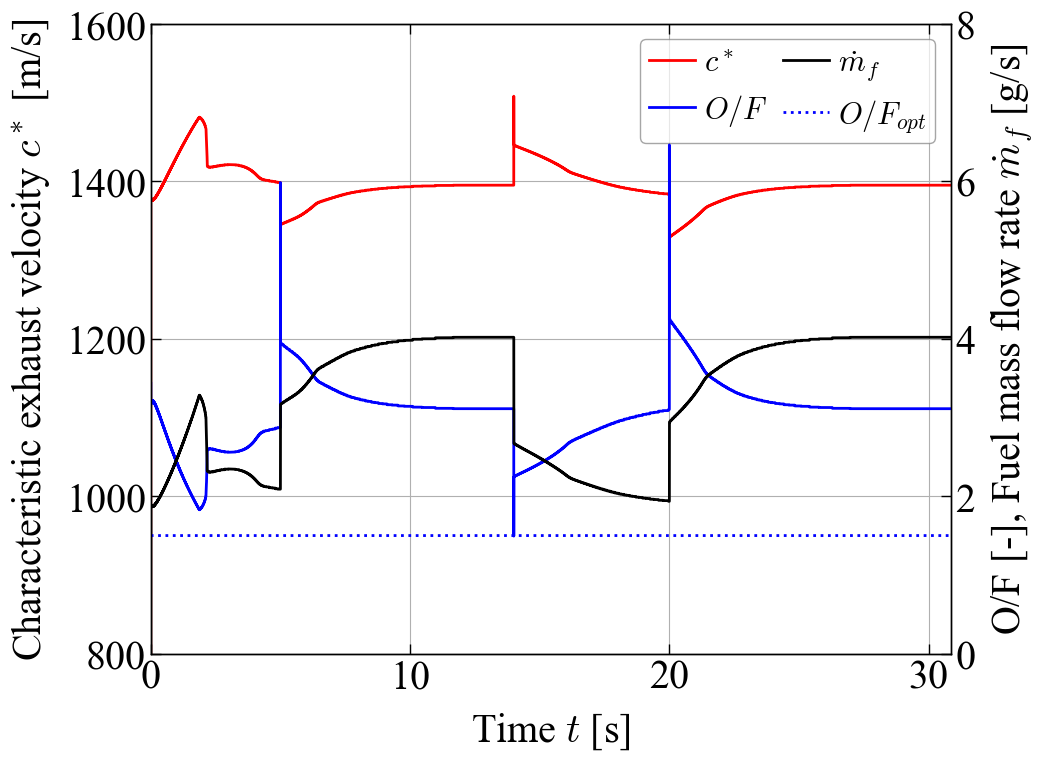

In [36]:
fig_cstr_o = plt.figure(figsize=(10,9))
ax_cstr_o = fig_cstr_o.add_subplot(111)
ax2_cstr_o = ax_cstr_o.twinx()
ax_cstr_o.plot(inst_orich.df["t"], inst_orich.df["cstr"], ls="-", c="r", label="$c^*$")
ax_cstr_o.set_ylim(800, 1600)
ax_cstr_o.set_xlabel("Time $t$ [s]")
ax_cstr_o.set_ylabel("Characteristic exhaust velocity $c^*$ [m/s]")
ax2_cstr_o.plot(inst_orich.df["t"], inst_orich.df["of"], ls="-", c="b", label="$O/F$")
ax2_cstr_o.plot(inst_orich.df["t"], inst_orich.df["mf"]*1e+3, ls="-", c="k", label="$\dot m_f$")
ax2_cstr_o.plot(inst_orich.df["t"], np.array([1.5 for i in inst_orich.df["t"]]), ls=":", c="b", label="$O/F_{opt}$")
ax2_cstr_o.set_ylabel("O/F [-], Fuel mass flow rate $\dot m_f$ [g/s]")
ax2_cstr_o.set_ylim(0.0, 8)
hl_cstr1_o, lalbel_cstr1_o = ax_cstr_o.get_legend_handles_labels()
hl_cstr2_o, lalbel_cstr2_o = ax2_cstr_o.get_legend_handles_labels()
ax_cstr_o.legend(hl_cstr1_o+hl_cstr2_o, lalbel_cstr1_o+lalbel_cstr2_o, loc="upper right", fontsize=22, ncol=2)
ax_cstr_o.grid()
fig_cstr_o.savefig("cstr_history_o.png", dpi=300)

# F-rich条件における　特性排気速度，O/F，および燃料流量履歴の表示

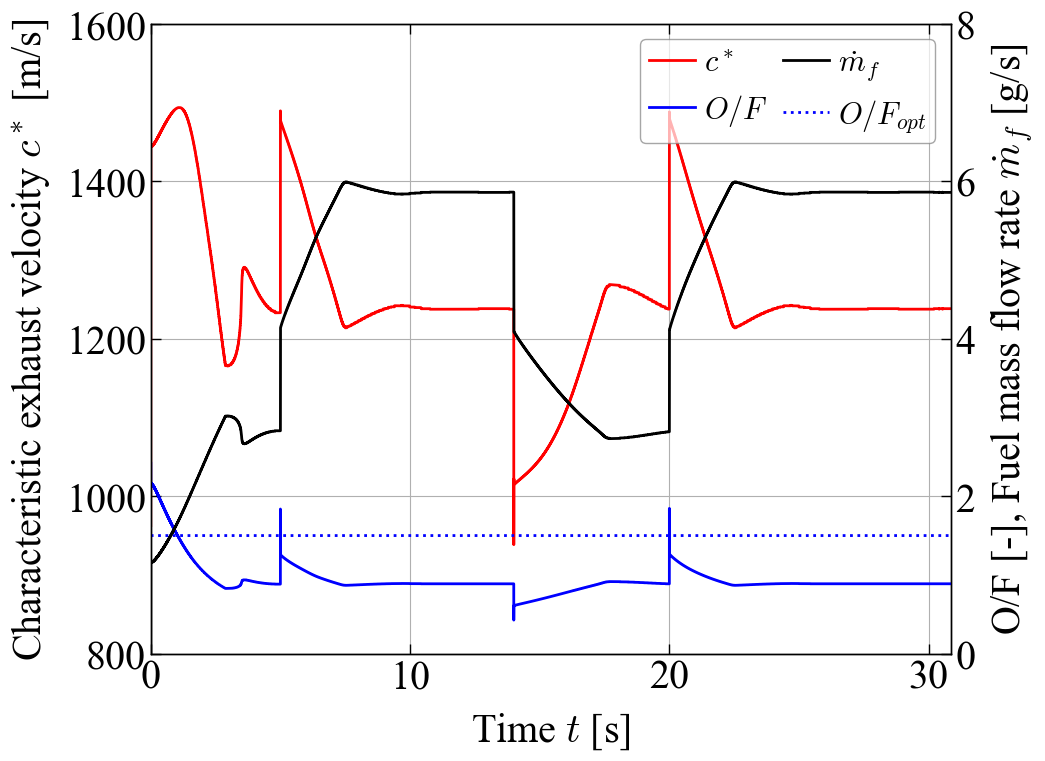

In [37]:
fig_cstr_f = plt.figure(figsize=(10,9))
ax_cstr_f = fig_cstr_f.add_subplot(111)
ax2_cstr_f = ax_cstr_f.twinx()
ax_cstr_f.plot(inst_frich.df["t"], inst_frich.df["cstr"], ls="-", c="r", label="$c^*$")
ax_cstr_f.set_ylim(800, 1600)
ax_cstr_f.set_xlabel("Time $t$ [s]")
ax_cstr_f.set_ylabel("Characteristic exhaust velocity $c^*$ [m/s]")
ax2_cstr_f.plot(inst_frich.df["t"], inst_frich.df["of"], ls="-", c="b", label="$O/F$")
ax2_cstr_f.plot(inst_frich.df["t"], inst_frich.df["mf"]*1e+3, ls="-", c="k", label="$\dot m_f$")
ax2_cstr_f.plot(inst_frich.df["t"], np.array([1.5 for i in inst_frich.df["t"]]), ls=":", c="b", label="$O/F_{opt}$")
ax2_cstr_f.set_ylabel("O/F [-], Fuel mass flow rate $\dot m_f$ [g/s]")
ax2_cstr_f.set_ylim(0.0, 8)
hl_cstr1_f, lalbel_cstr1_f = ax_cstr_f.get_legend_handles_labels()
hl_cstr2_f, lalbel_cstr2_f = ax2_cstr_f.get_legend_handles_labels()
ax_cstr_f.legend(hl_cstr1_f+hl_cstr2_f, lalbel_cstr1_f+lalbel_cstr2_f, loc="upper right", fontsize=22, ncol=2)
ax_cstr_f.grid()
fig_cstr_f.savefig("cstr_history_f.png", dpi=300)

# 動画出力　（最適O/F, Pc, mox, r）

## Class定義

In [38]:
class Sub_pcmox_r(gen.Main):
    def _plot_(self, t, dic_axis):
        ax1 = dic_axis["ax1"]
        ax2 = dic_axis["ax2"]
        ax2_sub = dic_axis["ax2_sub"]

        x = self.x
        pitch = self.cond_ex["pitch"]
        x_front = np.sort(-x)
        d = self.cond_ex["d"]
        index = np.where(self.t_history == t)[0][0]
        t_history = self.t_history[:(index+1)]
        
        r = self.r_history[index]
        r_front = np.array([0.0 for i in self.r_history[index]])
        img1 = ax1.plot(np.append(x_front, x)*1.0e+3, (np.append(r_front, r)+d/2)*1.0e+3, color="b")\
                + ax1.plot(np.append(x_front, x)*1.0e+3, -(np.append(r_front, r)+d/2)*1.0e+3, color="b")\
                + ax1.plot(np.append(x_front, x)*1.0e+3, (np.append(r_front, r)+d/2 +pitch)*1.0e+3, color="b")\
                + ax1.plot(np.append(x_front, x)*1.0e+3, -(np.append(r_front, r)+d/2 +pitch)*1.0e+3, color="b")\
                + ax1.plot(np.append(x_front, x)*1.0e+3, (np.append(r_front, r)+d/2 -pitch)*1.0e+3, color="b")\
                + ax1.plot(np.append(x_front, x)*1.0e+3, -(np.append(r_front, r)+d/2 -pitch)*1.0e+3, color="b")

        Pc_history = self.Pc_history[:(index+1)]
        mox_history = self.mox_history[:(index+1)]
        img2 = ax2_sub.plot(t_history, mox_history*1.0e+3, color="b", label="$m_{ox}$")\
                + ax2.plot(t_history, Pc_history*1.0e-6, color="r", label="$P_c$")
        return img1, img2


    def gen_img_list(self, fig, **kwargs):
        """ Stuckking the image file to img_list
        
        Parameters
        ----------
        r : 1d-ndarray of float
            radial fuel regression distance
        rdot : 1d-ndarray of float
            radial fuel regression rate
        img_list : list of matplotlib.pyplot.plot
            list of plot image which contains radial fuel regression plot and one more other plot
        
        Return
        ----------
        img_list: list of matplotlib.pyplot.plot
            image list after stacked new plot image
        """
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        fig.subplots_adjust(wspace=0.2)

        if "intrv" in kwargs:
            intrv = kwargs["intrv"]
        else:
            intrv = self.plot_param["interval"]
        x_max = self.cond_cal["x_max"]
        # y_max = self.plot_param["y_max"]
        dt = self.cond_cal["dt"]
        t_end = self.cond_cal["t_end"]

        # Regression shape
        ax1.set_xlabel("Axial distance $x$ [mm]")
        ax1.set_ylabel("Regression shape [mm]")
        x_begin = -x_max/4*1.0e+3
        x_end = x_max*1.0e+3
        y_begin = -(x_end-x_begin)/2
        y_end = (x_end-x_begin)/2
        ax1.set_ylim(y_begin, y_end)
        ax1.set_xlim(x_begin, x_end)
        ax1.grid()
        
        # Chamber pressure v.s. t
        ax2.set_xlabel("Time $t$ [s]")
        ax2.set_ylabel("Chamber pressure $P_c$ [MPa]")
        ax2.set_xlim(0, t_end)
        ax2.set_ylim(0, 1.1 *self.Pc_history.max()*1e-6)
        ax2.grid()
        ax2_sub = ax2.twinx()
        ax2_sub.set_ylabel("Oxidizer mass flow rate $\dot m_{ox}}}$ [g/s]")
        ax2_sub.set_ylim(0, 1.2 *self.mox_history.max()*1e+3)
 
        dic_axis = {"ax1": ax1,
                    "ax2": ax2,
                    "ax2_sub": ax2_sub
                    }
        print("Make list of image file for animation")
        for t in tqdm(self.t_history):
            if int(t/dt) % int(intrv/dt) == 0 or t==0.0:
                title = ax1.text(x_end/2, y_end*1.1, "t={} s".format(round(t,3)), fontsize="large")
                img1, img2 = self._plot_(t, dic_axis)
                self.img_list.append(img1 + img2 + [title])
        # add legend
        hl2, label2 = [ax2.get_legend_handles_labels()[0][0], ax2.get_legend_handles_labels()[1][0]]
        hl2_sub, label2_sub = [ax2_sub.get_legend_handles_labels()[0][0], ax2_sub.get_legend_handles_labels()[1][0]]
        ax2.legend([hl2, hl2_sub], [label2, label2_sub], loc="lower right")
        return self.img_list


## z=0.6の時

Make list of image file for animation
100%|██████████| 30851/30851 [00:04<00:00, 6670.78it/s]
Now generating animation...
Completed!


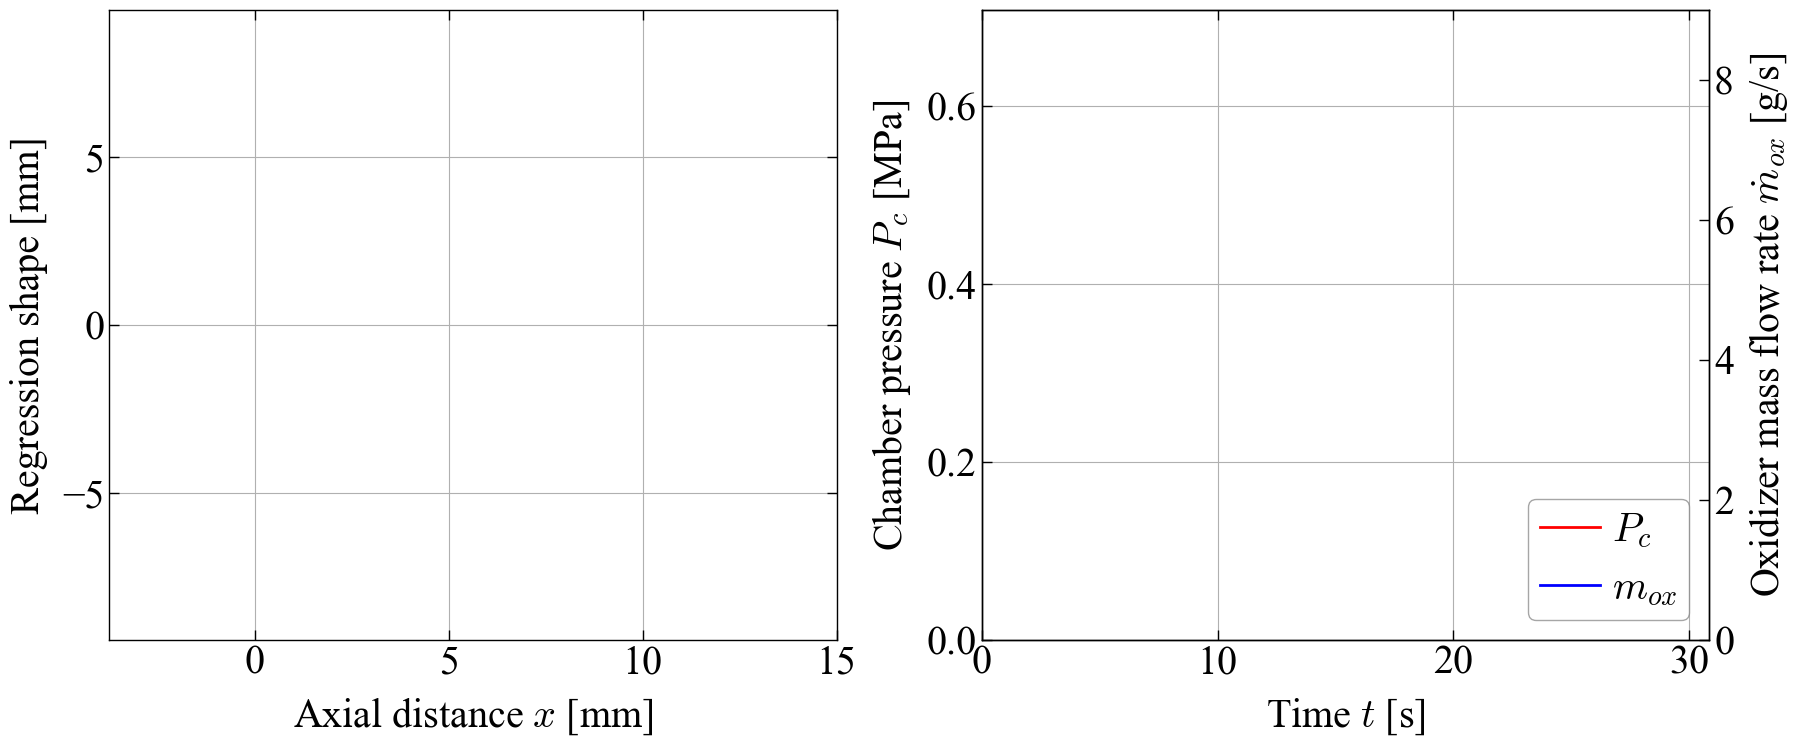

In [39]:
FLD_NAME = "2020_0806_185038_conf_OT03"
inst2 = Sub_pcmox_r(FLD_NAME)
INTERVAL = 0.1 # [s]
FIG = plt.figure(figsize=(20,9))
inst2.gen_img_list(FIG, intrv=INTERVAL)
animf_name = "animation_" + datetime.now().strftime("%Y_%m%d_%H%M%S") + ".mp4"
print("Now generating animation...")
anim = ArtistAnimation(FIG, inst2.img_list, interval=inst2.cond_cal["dt"]*1e+3)
anim.save(os.path.join(inst2.fld_name, animf_name), writer="ffmpeg", fps=1/INTERVAL)
# anim.save(os.path.join(inst.fld_name, animf_name), writer="ffmpeg")
print("Completed!")